In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

%matplotlib inline

#from lifelines import CoxPHFitter
#from lifelines.datasets import load_rossi
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#import statsmodels.stats.multicomp

In [2]:
featurized_data= pd.read_csv('~/Research/PHD/project/Hua Zheng/previous code/cleaned_EHR_treatment_param_lab_test_final.csv')


In [3]:
f = lambda x: x.rolling(2).apply(lambda x: (x[1] - x[0])/365.0).fillna(0)
featurized_data['time_last_vist'] = featurized_data.groupby('study_id').encounter_dt_ran.apply(f)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


In [4]:
featurized_data[['study_id','time_last_vist', 'encounter_dt_ran']]

,study_id,time_last_vist,encounter_dt_ran
0,1,0.000000,18957
1,1,0.438356,19117
2,1,0.016438,19123
3,1,0.260274,19218
4,1,0.019178,19225
5,1,0.090411,19258
6,1,0.013699,19263
7,1,0.005479,19265
8,1,0.178082,19330
9,1,0.257534,19424


In [11]:
hypertension_treatments = ['antihypertensives,_ace_inhibitors_cur',
 'calcium_channel_blocking_agents_cur',
 'beta-adrenergic_blocking_agents_cur',
 'angiotensin_receptor_antag.-thiazide_diuretic_comb_cur',
 'antihypertensives,_angiotensin_receptor_antagonist_cur',
 'thiazide_and_related_diuretics_cur',
 'potassium_sparing_diuretics_in_combination_cur',
 'alpha/beta-adrenergic_blocking_agents_cur',
 'antihyperlipid-_hmg-coa_ri-calcium_channel_blocker_cur',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_cur',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_cur',
 'angiotensin_receptor_blockr-calcium_channel_blockr_cur',
 'miotics_and_other_intraocular_pressure_reducers_cur',
 'renin_inhibitor,direct-angiotensin_receptr_antagon_cur',
 'angiotensin_recept-neprilysin_inhibitor_comb(arni)_cur',
 'beta-blockers_and_thiazide,thiazide-like_diuretics_cur',
 'bulk_chemicals_cur',
 'renin_inhibitor,direct_and_thiazide_diuretic_comb_cur',
 'anti-inflammatory,_interleukin-1_beta_blockers_cur',
 'antihypertensives,_ace_inhibitors_hist',
 'calcium_channel_blocking_agents_hist',
 'beta-adrenergic_blocking_agents_hist',
 'angiotensin_receptor_antag.-thiazide_diuretic_comb_hist',
 'antihypertensives,_angiotensin_receptor_antagonist_hist',
 'thiazide_and_related_diuretics_hist',
 'potassium_sparing_diuretics_in_combination_hist',
 'alpha/beta-adrenergic_blocking_agents_hist',
 'antihyperlipid-_hmg-coa_ri-calcium_channel_blocker_hist',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_hist',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_hist',
 'angiotensin_receptor_blockr-calcium_channel_blockr_hist',
 'miotics_and_other_intraocular_pressure_reducers_hist',
 'renin_inhibitor,direct-angiotensin_receptr_antagon_hist',
 'angiotensin_recept-neprilysin_inhibitor_comb(arni)_hist',
 'beta-blockers_and_thiazide,thiazide-like_diuretics_hist',
 'bulk_chemicals_hist',
 'renin_inhibitor,direct_and_thiazide_diuretic_comb_hist',
 'anti-inflammatory,_interleukin-1_beta_blockers_hist']

dm_treatment = ['antihyperglycemic,_biguanide_type_cur',
 'insulins_cur',
 'antihyperglycemic,insulin-release_stim.-biguanide_cur',
 'antihyperglycemic,_dpp-4_inhibitors_cur',
 'antihypergly,incretin_mimetic(glp-1_recep.agonist)_cur',
 'antihyperglycemic,_insulin-release_stimulant_type_cur',
 'antihyperglycemic,dpp-4_inhibitor-biguanide_combs._cur',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_cur',
 'antihyperglycemic,_alpha-glucosidase_inhibitors_cur',
 'antihyperglycemic,_thiazolidinedione_and_biguanide_cur',
 'antihyperglycemic,thiazolidinedione(pparg_agonist)_cur',
 'antihyperglycemic_-_dopamine_receptor_agonists_cur',
 'antihyperglycemic-sglt2_inhibitor-biguanide_combs._cur',
 'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_cur',
 'antihyperglycemic,_thiazolidinedione-sulfonylurea_cur',
 'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_cur',
 'antihypergly,insulin,long_act-glp-1_recept.agonist_cur',
 'antihyperglycemic,_amylin_analog-type_cur',
 'antihyperglycemic,_biguanide_type_hist',
 'insulins_hist',
 'antihyperglycemic,insulin-release_stim.-biguanide_hist',
 'antihyperglycemic,_dpp-4_inhibitors_hist',
 'antihypergly,incretin_mimetic(glp-1_recep.agonist)_hist',
 'antihyperglycemic,_insulin-release_stimulant_type_hist',
 'antihyperglycemic,dpp-4_inhibitor-biguanide_combs._hist',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_hist',
 'antihyperglycemic,_alpha-glucosidase_inhibitors_hist',
 'antihyperglycemic,_thiazolidinedione_and_biguanide_hist',
 'antihyperglycemic,thiazolidinedione(pparg_agonist)_hist',
 'antihyperglycemic_-_dopamine_receptor_agonists_hist',
 'antihyperglycemic-sglt2_inhibitor-biguanide_combs._hist',
 'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_hist',
 'antihyperglycemic,_thiazolidinedione-sulfonylurea_hist',
 'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_hist',
 'antihypergly,insulin,long_act-glp-1_recept.agonist_hist',
 'antihyperglycemic,_amylin_analog-type_hist']

In [5]:
len(dm_treatment + hypertension_treatments)

37

In [10]:
list(featurized_data.columns)

['study_id',
 'encounter_dt_ran',
 'age',
 'smoke',
 'sex',
 'race',
 'creatinine',
 'hemoglobin_a1c',
 'cholesterol,_total',
 'hdl_cholesterol',
 'triglycerides',
 'egfr_mdrd_african_american',
 'ldl_cholesterol',
 'egfr_mdrd_non_african_american',
 'bp_systolic',
 'bp_diastolic',
 'bmi',
 'creatinine_max',
 'hemoglobin_a1c_max',
 'cholesterol,_total_max',
 'hdl_cholesterol_max',
 'triglycerides_max',
 'egfr_mdrd_african_american_max',
 'ldl_cholesterol_max',
 'egfr_mdrd_non_african_american_max',
 'bp_systolic_max',
 'bp_diastolic_max',
 'bmi_max',
 'creatinine_min',
 'hemoglobin_a1c_min',
 'cholesterol,_total_min',
 'hdl_cholesterol_min',
 'triglycerides_min',
 'egfr_mdrd_african_american_min',
 'ldl_cholesterol_min',
 'egfr_mdrd_non_african_american_min',
 'bp_systolic_min',
 'bp_diastolic_min',
 'bmi_min',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_hist',
 'alpha/beta-adrenergic_blocking_agents_hist',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_hist',
 'angiotensi

In [217]:
featurized_data['sex']

0          Female
1          Female
2          Female
3          Female
4          Female
5          Female
6          Female
7          Female
8          Female
9          Female
10         Female
11         Female
12         Female
13         Female
14         Female
15         Female
16         Female
17         Female
18         Female
19         Female
20         Female
21         Female
22         Female
23         Female
24         Female
25         Female
26         Female
27         Female
28         Female
29         Female
            ...  
1551856      Male
1551857      Male
1551858      Male
1551859      Male
1551860      Male
1551861      Male
1551862      Male
1551863      Male
1551864      Male
1551865      Male
1551866      Male
1551867      Male
1551868      Male
1551869      Male
1551870      Male
1551871    Female
1551872    Female
1551873    Female
1551874    Female
1551875    Female
1551876    Female
1551877    Female
1551878    Female
1551879    Female
1551880   

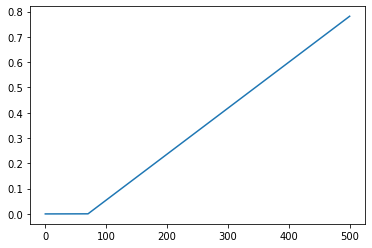

In [6]:
def graph_exp(x, lower, scale):
    y = np.zeros(len(x))
    for i, k in enumerate(x):
        if k >= lower: 
            y[i] = (k - lower)/scale
    plt.plot(x, y)

graph_exp(np.linspace(0, 500, 10000),70,550)

In [7]:
(['sex','age','cholesterol,_total','hdl_cholesterol','bp_systolic','smoke'] + hypertension_treatments + dm_treatment)[6+len(hypertension_treatments):]

['antihyperglycemic,_biguanide_type_cur',
 'insulins_cur',
 'antihyperglycemic,insulin-release_stim.-biguanide_cur',
 'antihyperglycemic,_dpp-4_inhibitors_cur',
 'antihypergly,incretin_mimetic(glp-1_recep.agonist)_cur',
 'antihyperglycemic,_insulin-release_stimulant_type_cur',
 'antihyperglycemic,dpp-4_inhibitor-biguanide_combs._cur',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_cur',
 'antihyperglycemic,_alpha-glucosidase_inhibitors_cur',
 'antihyperglycemic,_thiazolidinedione_and_biguanide_cur',
 'antihyperglycemic,thiazolidinedione(pparg_agonist)_cur',
 'antihyperglycemic_-_dopamine_receptor_agonists_cur',
 'antihyperglycemic-sglt2_inhibitor-biguanide_combs._cur',
 'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_cur',
 'antihyperglycemic,_thiazolidinedione-sulfonylurea_cur',
 'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_cur',
 'antihypergly,insulin,long_act-glp-1_recept.agonist_cur',
 'antihyperglycemic,_amylin_analog-type_cur']

In [8]:
def framingham_ascvd_risk(x):
    if x[0] == 0:
        AgeFactor = 2.32888 
        TotalCholFactor = 1.20904
        HDLCholFactor = -0.70833
        if x[6] == 1:
            SysBPFactor = 2.82263 
        else: 
            SysBPFactor = 2.76157
            
        if x[5] == 1:
            Cig = 0.52873
        else:
            Cig = 0.0
            
        if x[7] == 1:
            DM = 0.69154 
        else: 
            DM = 0.0
        AvgRisk = 26.1931
        RiskPeriodFactor = 0.95012
    else:
        AgeFactor = 3.06117 
        TotalCholFactor = 1.12370
        HDLCholFactor = -0.93263
        if x[6] == 1:
            SysBPFactor = 1.99881 
        else: 
            SysBPFactor = 1.93303
        if x[5] == 1:
            Cig = 0.65451
        else:
            Cig = 0.0
        
        if x[7] == 1:
            DM = 0.57367 
        else: 
            DM =0.0 
        AvgRisk = 23.9802
        RiskPeriodFactor = 0.88936
        
    risk_factors = (np.log(x[1]) * AgeFactor) + (np.log(x[2]) * TotalCholFactor) + (np.log(x[3]) * HDLCholFactor) + (np.log(x[4]) * SysBPFactor) + Cig + DM - AvgRisk
    risk = 100 * (1 - np.power(RiskPeriodFactor, np.exp(risk_factors)))
    return(risk)

print(framingham_ascvd_risk([0,60,180.34, 40.09, 120, 1, 1,0])-framingham_ascvd_risk([0,60,180, 40, 120, 1, 1,0]))
print(framingham_ascvd_risk([0,60,250, 50.09, 120, 1, 1,0]))



0.008712574920254568
16.925179183413665


In [12]:
def framingham_ascvd_risk(x):
    if x['sex'] == 'Female':
        AgeFactor = 2.32888 
        TotalCholFactor = 1.20904
        HDLCholFactor = -0.70833
        if sum(x[hypertension_treatments]) > 0:
            SysBPFactor = 2.82263 
        else: 
            SysBPFactor = 2.76157
            
        if x['smoke'] == 1:
            Cig = 0.52873
        else:
            Cig = 0.0
            
        if sum(x[dm_treatment]) > 0:
            DM = 0.69154 
        else: 
            DM = 0.0
        AvgRisk = 26.1931
        RiskPeriodFactor = 0.95012
    else:
        AgeFactor = 3.06117 
        TotalCholFactor = 1.12370
        HDLCholFactor = -0.93263
        if sum(x[hypertension_treatments]) > 0: 
            SysBPFactor = 1.99881 
        else: 
            SysBPFactor = 1.93303
        if x['smoke'] == 1:
            Cig = 0.65451
        else:
            Cig = 0.0
        
        if sum(x[dm_treatment]) > 0: 
            DM = 0.57367 
        else: 
            DM =0.0 
        AvgRisk = 23.9802
        RiskPeriodFactor = 0.88936
        
    risk_factors = (np.log(x['age']) * AgeFactor) + (np.log(x['cholesterol,_total']) * TotalCholFactor) + (np.log(x['hdl_cholesterol']) * HDLCholFactor) + (np.log(x['bp_systolic']) * SysBPFactor) + Cig + DM - AvgRisk
    
    risk = 100 * (1 - np.power(RiskPeriodFactor, np.exp(risk_factors)))
    return(risk)

featurized_data['risk_ascvd'] = featurized_data.apply(lambda x: framingham_ascvd_risk(x), axis = 1)

# featurized_data.groupby('study_id').risk_ascvd.apply(f_ascvd)#[['sex_idx','age','cholesterol,_total','hdl_cholesterol','bp_systolic','smoke'] + hypertension_treatments + dm_treatment]


In [13]:
severity_rate = 1.25
max_reward = 30
eta = 0.75
def stablizer(x, upper, lower):
    slop = 0.2
    y = 0
    if x[1] > upper: 
        y = slop*(upper - x[1]) 
    elif x[1] < lower: 
        y = slop*(x[1] - lower) 
    else: 
        y = 0
    y += 2
    return(y)

def improver(x):
    return(x[0] - x[1])

def fun_factor(x, lower, scale):
    y = 0
    if x >= lower: 
        y = (x - lower)/scale
    return(y)

def improvement(x, lower, scale):
    if x[0] <= lower and x[1] <= lower:
        return(0.0)
    else:
        return((x[0] - x[1]) * fun_factor((x[0] + x[1]) / 2.0, lower, scale))
def risk_diff(x):
    return(x[0] - x[1])

def improvement_bp(x, lower, scale):
    if x[0] <= lower and x[1] <= lower:
        return(0.0)
    else:
        return(x[0] - x[1])

               
# f_s = lambda x: x.rolling(1).apply(lambda x: max_reward-pow(x[0]-120,severity_rate) if x[0] > 120 else x[0]-120).shift(-1,fill_value=0) # last visit has 0 rewards 
# f_d = lambda x: x.rolling(1).apply(lambda x: max_reward-pow(x[0]-80,severity_rate) if x[0] > 80 else x[0]-120).shift(-1,fill_value=0) # last visit has 0 rewards 
# f_s = lambda x: x.rolling(2).apply(lambda x: (1-eta)*stablizer(x,120,100) + eta*improver(x)).shift(-1,fill_value=0) # last visit has 0 rewards 
# f_d = lambda x: x.rolling(2).apply(lambda x: (1-eta)*stablizer(x,80,60) + eta*improver(x)).shift(-1,fill_value=0) # last visit has 0 rewards 
f_s = lambda x: x.rolling(2).apply(lambda x: improvement_bp(x, 110, 17.7)).shift(-1,fill_value=0) # last visit has 0 rewards 
f_d = lambda x: x.rolling(2).apply(lambda x: improvement_bp(x, 70, 10.5)).shift(-1,fill_value=0) # last visit has 0 rewards 
f_ldl = lambda x: x.rolling(2).apply(lambda x: improvement(x,70,37.2)).shift(-1,fill_value=0) # last visit has 0 rewards 
f_trig = lambda x: x.rolling(2).apply(lambda x: improvement(x, 80 ,135)).shift(-1,fill_value=0) # last visit has 0 rewards 
f_a1c = lambda x: x.rolling(2).apply(lambda x: improvement(x,5.5,1.63)).shift(-1,fill_value=0) # last visit has 0 rewards 
f_ascvd = lambda x: x.rolling(2).apply(lambda x: risk_diff(x)).shift(-1,fill_value=0) # last visit has 0 rewards 

featurized_data['next_ascvd_risk'] = featurized_data.groupby('study_id').risk_ascvd.apply(f_ascvd)
featurized_data['next_bp_systolic'] = featurized_data.groupby('study_id').bp_systolic.apply(f_s)
featurized_data['next_bp_diastolic'] = featurized_data.groupby('study_id').bp_diastolic.apply(f_d)
# featurized_data['next_ldl_cholesterol'] = featurized_data.groupby('study_id').ldl_cholesterol.apply(f_ldl)
# featurized_data['next_triglycerides'] = featurized_data.groupby('study_id').triglycerides.apply(f_trig)
featurized_data['next_a1c'] = featurized_data.groupby('study_id').hemoglobin_a1c.apply(f_a1c)

featurized_data['reward_bp'] = featurized_data[['next_bp_systolic']] # featurized_data[['next_bp_systolic', 'next_bp_diastolic']].mean(axis=1)
# featurized_data['reward_ascvd'] = featurized_data[['next_ldl_cholesterol', 'next_triglycerides']].mean(axis=1)
featurized_data['reward_ascvd'] = featurized_data[['next_ascvd_risk']].mean(axis=1)
featurized_data['reward_diabetes'] = featurized_data[['next_a1c']].mean(axis=1)

featurized_data = featurized_data.round(4)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objec

In [14]:
# f_ldl = lambda x: x.rolling(2).apply(lambda x).shift(-1,fill_value=0)#.apply(lambda x: improvement(x,70,37.2))
featurized_data['reward_bp'] = featurized_data["reward_bp"] / featurized_data["reward_bp"].std()
featurized_data['reward_ascvd'] = featurized_data["reward_ascvd"] / featurized_data["reward_ascvd"].std() 
featurized_data['reward_diabetes'] = featurized_data["reward_diabetes"] / featurized_data["reward_diabetes"].std() 

In [15]:
featurized_data['reward'] = featurized_data[['reward_bp', 'reward_ascvd', 'reward_diabetes']].mean(axis=1)


In [19]:
featurized_data[['study_id','hemoglobin_a1c','bp_systolic','bp_diastolic','next_bp_systolic','next_bp_diastolic','reward_ascvd','reward_diabetes','reward_bp']]

,study_id,hemoglobin_a1c,bp_systolic,bp_diastolic,next_bp_systolic,next_bp_diastolic,reward_ascvd,reward_diabetes,reward_bp
0,1,6.6000,136.0000,86.0000,0.0000,0.0000,0.000000,0.000000,0.000000
1,1,6.6000,136.0000,86.0000,0.2268,0.4537,0.040919,-0.013703,0.026675
2,1,6.6113,135.7732,85.5463,1.7732,3.5463,0.302155,-0.111935,0.208553
3,1,6.7000,134.0000,82.0000,4.9585,4.2501,0.141719,0.000000,0.583190
4,1,6.7000,129.0415,77.7499,9.0415,7.7499,-0.758809,0.091470,1.063408
5,1,6.6280,120.0000,70.0000,-3.5141,-4.2125,-0.159749,0.009432,-0.413308
6,1,6.6203,123.5141,74.2125,0.0962,0.0157,0.006231,0.002847,0.011314
7,1,6.6181,123.4179,74.1968,13.4179,2.1968,0.761508,0.332958,1.578135
8,1,6.3000,110.0000,72.0000,-13.6144,-4.8627,-0.899620,-0.230276,-1.601246
9,1,6.5304,123.6144,76.8627,3.6144,4.8627,0.288981,0.383141,0.425105


In [25]:
pd.read_csv('~/Research/PHD/project/Hua Zheng/previous code/cleaned_EHR_treatment_param_lab_test_final_3diseases-v5.csv')[['study_id','hemoglobin_a1c','bp_systolic','bp_diastolic','next_bp_systolic','next_bp_diastolic','reward_ascvd','reward_diabetes','reward_bp']]

,study_id,hemoglobin_a1c,bp_systolic,bp_diastolic,next_bp_systolic,next_bp_diastolic,reward_ascvd,reward_diabetes,reward_bp
0,1,6.6000,136.0000,86.0000,136.0000,86.0000,0.000000,0.000000,0.000000
1,1,6.6000,136.0000,86.0000,135.7732,85.5463,0.031462,-0.013703,0.026675
2,1,6.6113,135.7732,85.5463,134.0000,82.0000,0.232328,-0.111935,0.208553
3,1,6.7000,134.0000,82.0000,129.0415,77.7499,0.108968,0.000000,0.583190
4,1,6.7000,129.0415,77.7499,120.0000,70.0000,0.201224,0.091470,1.063408
5,1,6.6280,120.0000,70.0000,123.5141,74.2125,-0.064434,0.009432,-0.413308
6,1,6.6203,123.5141,74.2125,123.4179,74.1968,0.002528,0.002847,0.011314
7,1,6.6181,123.4179,74.1968,110.0000,72.0000,0.305043,0.332958,1.578135
8,1,6.3000,110.0000,72.0000,123.6144,76.8627,-0.360913,-0.230276,-1.601246
9,1,6.5304,123.6144,76.8627,120.0000,72.0000,0.116721,0.383141,0.425105


In [24]:
featurized_data.drop(['next_bp_systolic', 'next_bp_diastolic', 'next_a1c','next_ascvd_risk'], inplace=True, axis = 1)

data_dummy = pd.get_dummies(featurized_data, columns=['race', 'sex'], drop_first=True)


In [66]:
list(data_dummy.columns[:167])
list(data_dummy.columns[167:])
list(data_dummy.columns[:-9])
# data_dummy.columns.to_list()

['study_id',
 'encounter_dt_ran',
 'age',
 'smoke',
 'creatinine',
 'hemoglobin_a1c',
 'cholesterol,_total',
 'hdl_cholesterol',
 'triglycerides',
 'egfr_mdrd_african_american',
 'ldl_cholesterol',
 'egfr_mdrd_non_african_american',
 'bp_systolic',
 'bp_diastolic',
 'bmi',
 'creatinine_max',
 'hemoglobin_a1c_max',
 'cholesterol,_total_max',
 'hdl_cholesterol_max',
 'triglycerides_max',
 'egfr_mdrd_african_american_max',
 'ldl_cholesterol_max',
 'egfr_mdrd_non_african_american_max',
 'bp_systolic_max',
 'bp_diastolic_max',
 'bmi_max',
 'creatinine_min',
 'hemoglobin_a1c_min',
 'cholesterol,_total_min',
 'hdl_cholesterol_min',
 'triglycerides_min',
 'egfr_mdrd_african_american_min',
 'ldl_cholesterol_min',
 'egfr_mdrd_non_african_american_min',
 'bp_systolic_min',
 'bp_diastolic_min',
 'bmi_min',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_hist',
 'alpha/beta-adrenergic_blocking_agents_hist',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_hist',
 'angiotensin_recept-neprilys

In [25]:
data_dummy.columns = list(data_dummy.columns[:-9]) + ['race_asian', 'race_multiple_race',
       'race_native_american', 'race_native_hawaiian_or_other_pacific_islander', 'race_other',
       'race_patient_refused', 'race_unknown', 'race_white', 'sex_male']

In [68]:
list(data_dummy.columns[123:166])

['thiazide_and_related_diuretics_cur',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic',
 'alpha/beta-adrenergic_blocking_agents',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide',
 'angiotensin_recept-neprilysin_inhibitor_comb(arni)',
 'angiotensin_receptor_antag.-thiazide_diuretic_comb',
 'angiotensin_receptor_blockr-calcium_channel_blockr',
 'anti-inflammatory,_interleukin-1_beta_blockers',
 'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione',
 'antihypergly,incretin_mimetic(glp-1_recep.agonist)',
 'antihypergly,insulin,long_act-glp-1_recept.agonist',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib',
 'antihyperglycemic_-_dopamine_receptor_agonists',
 'antihyperglycemic,_alpha-glucosidase_inhibitors',
 'antihyperglycemic,_amylin_analog-type',
 'antihyperglycemic,_biguanide_type',
 'antihyperglycemic,_dpp-4_inhibitors',
 'antihyperglycemic,_insulin-release_stimulant_type',
 'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb',
 'antihyperglycemic,_thiazolidinedione_and_

In [26]:
label_cols = list(data_dummy.columns[123:166])
# next_state_cols = ['next_bp_systolic', 'next_bp_diastolic', 'next_ldl_cholesterol', 'next_triglycerides']
state_cols = list(set(data_dummy.columns) - set(label_cols)  - set(['reward', 'reward_bp', 'reward_ascvd', 'reward_diabetes']) - set(['study_id','encounter_dt_ran']))
reward_cols = ['reward']

In [27]:
len(label_cols +state_cols*2 +reward_cols) # 308
# len(label_cols)
# len(next_state_cols)
# len(['egfr_mdrd_african_american_min', 'egfr_mdrd_african_american_max', 'egfr_mdrd_african_american', 'egfr_mdrd_non_african_american', 'egfr_mdrd_non_african_american_max','egfr_mdrd_non_african_american_min', 'next_egfr_mdrd_african_american','next_egfr_mdrd_african_american_max','next_egfr_mdrd_african_american_min', 'next_egfr_mdrd_non_african_american','next_egfr_mdrd_non_african_american_max', 'next_egfr_mdrd_non_african_american_min'])

308

In [28]:
next_state_cols = ['next_' + s for s in list(state_cols)]

data_dummy[next_state_cols] = data_dummy.groupby('study_id')[list(state_cols)].shift(-1)

In [21]:
list(data_dummy.columns)

['study_id',
 'encounter_dt_ran',
 'age',
 'smoke',
 'creatinine',
 'hemoglobin_a1c',
 'cholesterol,_total',
 'hdl_cholesterol',
 'triglycerides',
 'egfr_mdrd_african_american',
 'ldl_cholesterol',
 'egfr_mdrd_non_african_american',
 'bp_systolic',
 'bp_diastolic',
 'bmi',
 'creatinine_max',
 'hemoglobin_a1c_max',
 'cholesterol,_total_max',
 'hdl_cholesterol_max',
 'triglycerides_max',
 'egfr_mdrd_african_american_max',
 'ldl_cholesterol_max',
 'egfr_mdrd_non_african_american_max',
 'bp_systolic_max',
 'bp_diastolic_max',
 'bmi_max',
 'creatinine_min',
 'hemoglobin_a1c_min',
 'cholesterol,_total_min',
 'hdl_cholesterol_min',
 'triglycerides_min',
 'egfr_mdrd_african_american_min',
 'ldl_cholesterol_min',
 'egfr_mdrd_non_african_american_min',
 'bp_systolic_min',
 'bp_diastolic_min',
 'bmi_min',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_hist',
 'alpha/beta-adrenergic_blocking_agents_hist',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_hist',
 'angiotensin_recept-neprilys

In [29]:
data_dummy.to_csv('~/Research/PHD/project/Hua Zheng/previous code/cleaned_EHR_treatment_param_lab_test_final_3diseases-v6.csv', index=False)
